In [ ]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-ff0e4cf9-1151-e2af-ea68-f91fe0aba473)


## 1.Data

### 1.1 Preprocessing

In [ ]:
import string
import re

In [ ]:
def seperatePunct(text):
    x = re.sub( r'([a-zA-Z])([,.!?])', r'\1 \2', text)
    return x

def removeTag(text):
    x = re.sub("\\{.{1}([^}]+)\\}", '\\1', text)
    return x

def lower_text(text):
    return text.lower()

def changeTag(text):
    x = re.sub( r'\<([a-zA-Z]) ([a-zA-Z])\>', r'\1 \2', text)
    return x

def normalizeWhitespace(text):
    result = str(text)
    result = re.sub(r"//t",r"\t", result)
    result = re.sub(r"( )\1+",r"\1", result)
    result = re.sub(r"(\n)\1+",r"\1", result)
    result = re.sub(r"(\r)\1+",r"\1", result)
    result = re.sub(r"(\t)\1+",r"\1", result)

    return result.strip(" ")

### Removing punctuations. (!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~)
def removePunctuations(text,exception=""):
    remove=string.punctuation+"“"+"”"+"“"+"–"
    if len(exception)!="":
        exception = list(exception)
        for i in exception:
            remove = remove.replace(i, "")
    translator = str.maketrans(remove , ' '* len(remove))
    text = text.translate(translator)

    return re.sub(' +', ' ', text)

def stringifyElement(text):
    return str(text)

def transformContraction(text):
  
    CONTRACTIONS_DICT = { 
        "ain't": "are not","'s":" is","aren't": "are not",
        "can't": "cannot","can't've": "cannot have",
        "'cause": "because","could've": "could have","couldn't": "could not",
        "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
        "don't": "do not","hadn't": "had not","hadn't've": "had not have",
        "hasn't": "has not","haven't": "have not","he'd": "he would",
        "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
        "how'd": "how did","how'd'y": "how do you","how'll": "how will",
        "I'd": "I would", "I'd've": "I would have","I'll": "I will",
        "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
        "it'd": "it would","it'd've": "it would have","it'll": "it will",
        "it'll've": "it will have", "let's": "let us","ma'am": "madam",
        "mayn't": "may not","might've": "might have","mightn't": "might not", 
        "mightn't've": "might not have","must've": "must have","mustn't": "must not",
        "mustn't've": "must not have", "needn't": "need not",
        "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
        "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
        "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
        "she'll": "she will", "she'll've": "she will have","should've": "should have",
        "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
        "that'd": "that would","that'd've": "that would have", "there'd": "there would",
        "there'd've": "there would have", "they'd": "they would",
        "they'd've": "they would have","they'll": "they will",
        "they'll've": "they will have", "they're": "they are","they've": "they have",
        "to've": "to have","wasn't": "was not","we'd": "we would",
        "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
        "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
        "what'll've": "what will have","what're": "what are", "what've": "what have",
        "when've": "when have","where'd": "where did", "where've": "where have",
        "who'll": "who will","who'll've": "who will have","who've": "who have",
        "why've": "why have","will've": "will have","won't": "will not",
        "won't've": "will not have", "would've": "would have","wouldn't": "would not",
        "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
        "y'all'd've": "you all would have","y'all're": "you all are",
        "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
        "you'll": "you will","you'll've": "you will have", "you're": "you are",
        "you've": "you have"
    }
    for key in CONTRACTIONS_DICT.keys():
        text = text.lower().replace(key, CONTRACTIONS_DICT[key])
    return text

In [ ]:
!gdown --id 1fDOUSOvJcCa0DT4ZHgvjSLZRUQeoKyor

Downloading...
From: https://drive.google.com/uc?id=1fDOUSOvJcCa0DT4ZHgvjSLZRUQeoKyor
To: /content/SwDA.zip
100% 18.6M/18.6M [00:00<00:00, 113MB/s] 


In [ ]:
!unzip /content/SwDA.zip

Archive:  /content/SwDA.zip
  inflating: test.csv                
  inflating: train.csv               
  inflating: validation.csv          


In [ ]:
import pandas as pd 

train = pd.read_csv("/content/train.csv")
valid = pd.read_csv("/content/validation.csv")
test = pd.read_csv("/content/test.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
list(train["text"].values)

['Okay.',
 'So,',
 'I guess,',
 'What kind of experience do you, do you have, then with child care?',
 'I think, uh, I wonder if that worked.',
 'Does it say something?',
 'I think it usually does.',
 'You might try, uh,',
 "I don't know,",
 'hold it down a little longer,',
 'and see if it, uh,',
 'Okay <beep>.',
 '<<long pause>> Well,',
 'Okay',
 'I,',
 'Does it usually make a recording or s ,',
 "Well, I don't remember.",
 'It seemed like it did,',
 'but <laughter> it might not.',
 'I guess',
 'Okay.',
 'I guess we can start. Uh,',
 'Okay.',
 'No,',
 "I don't, I don't have any kids.",
 'I, uh, my sister has a, she just had a baby,',
 "he's about five months old",
 'and she was worrying about going back to work and what she was going to do with him and',
 'Uh huh.',
 'the different,',
 'do you have kids?',
 'I have three.',
 'Oh, really?',
 'Uh huh.',
 '<Laughter>.',
 'Yeah,',
 'I do <laughter>.',
 'Yes, uh,',
 "I don't work, though,",
 'but I used to work and, when I had two children

In [ ]:
#Chuyển sang kiểu chuỗi
train["text"] = train["text"].apply(stringifyElement)
valid["text"] = valid["text"].apply(stringifyElement)
test["text"] = test["text"].apply(stringifyElement)

In [ ]:
# Chuyển về ký tự thường
train["text"] = train["text"].apply(lower_text)
valid["text"] = valid["text"].apply(lower_text)
test["text"]  = test["text"].apply(lower_text)

In [ ]:
#Biến đổi rút gọn cụm từ rút gọn (can't => can not)
train["text"] = train["text"].apply(transformContraction)
valid["text"] = valid["text"].apply(transformContraction)
test["text"] = test["text"].apply(transformContraction)

In [ ]:
#Xoá các ký tự đặc biệt, đấu câu chỉ giữ [.,?!]
train["text"] = train["text"].apply(seperatePunct)
valid["text"] = valid["text"].apply(seperatePunct)
test["text"] = test["text"].apply(seperatePunct)

In [ ]:
# Loại bỏ các dấu chấm câu
train["text"] = train["text"].apply(removePunctuations)
valid["text"] = valid["text"].apply(removePunctuations)
test["text"] = test["text"].apply(removePunctuations)

In [ ]:
# Chuyển hoá lại khoảng trống
train["text"] = train["text"].apply(normalizeWhitespace)
valid["text"] = valid["text"].apply(normalizeWhitespace)
test["text"] = test["text"].apply(normalizeWhitespace)

In [ ]:
list(train["text"].values)

['okay',
 'so',
 'i guess',
 'what kind of experience do you do you have then with child care',
 'i think uh i wonder if that worked',
 'does it say something',
 'i think it usually does',
 'you might try uh',
 'i do not know',
 'hold it down a little longer',
 'and see if it uh',
 'okay beep',
 'long pause well',
 'okay',
 'i',
 'does it usually make a recording or s',
 'well i do not remember',
 'it seemed like it did',
 'but laughter it might not',
 'i guess',
 'okay',
 'i guess we can start uh',
 'okay',
 'no',
 'i do not i do not have any kids',
 'i uh my sister has a she just had a baby',
 'he is about five months old',
 'and she was worrying about going back to work and what she was going to do with him and',
 'uh huh',
 'the different',
 'do you have kids',
 'i have three',
 'oh really',
 'uh huh',
 'laughter',
 'yeah',
 'i do laughter',
 'yes uh',
 'i do not work though',
 'but i used to work and when i had two children',
 'uh huh',
 'i work off and on just temporarily and usu

### 1.2 EDA

In [ ]:
max([len(c.split()) for c in train["text"].values])

81

(array([1.2000e+02, 4.4080e+04, 3.1548e+04, 1.3359e+04, 1.2212e+04,
        1.1945e+04, 1.1908e+04, 1.1195e+04, 1.0106e+04, 9.0890e+03,
        7.9970e+03, 6.8130e+03, 5.9720e+03, 5.1340e+03, 4.3660e+03,
        3.8470e+03, 3.3160e+03, 2.7800e+03, 2.4450e+03, 2.1480e+03,
        1.7930e+03, 1.5310e+03, 1.3110e+03, 1.1500e+03, 1.0040e+03,
        8.4400e+02, 7.2900e+02, 6.6100e+02, 5.3400e+02, 4.6600e+02,
        4.0100e+02, 3.5500e+02, 3.0200e+02, 2.6100e+02, 2.3000e+02,
        2.1700e+02, 1.4700e+02, 1.6100e+02, 1.4300e+02, 1.0500e+02,
        1.1500e+02, 9.4000e+01, 7.2000e+01, 7.5000e+01, 5.3000e+01,
        4.9000e+01, 4.3000e+01, 3.9000e+01, 4.0000e+01, 5.4000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <a list of 50 Patch objects>

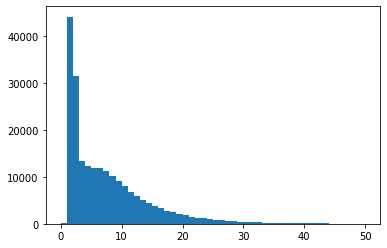

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(c.split()) for c in train["text"].values], bins=50, range=(0,50))

* Max từ trong câu là 81 từ
* Những câu có 0 từ, 1 từ khá nhiều

### 1.3 Data Loader

In [ ]:
import numpy as np
def split_conversation(df):
    x_data = []
    y_data = []
    for num in np.unique(df["conversation_no"]):
        indx = (df["conversation_no"] == num)
        x_data.append(list(df[indx]["text"].values))
        y_data.append(list(df[indx]["damsl_act_tag"].values))
    return x_data, y_data

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn

class DADataset(Dataset):
    
    def __init__(self, tokenizer, text, label, max_len=512):
        
        self.text = text
        self.label = label
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __len__(self):
        return len(self.text)
    
    def __getitem__(self, index):
        
        sentences = self.text[index]
        labels = self.label[index]
        
        # Tokenize all of the sentences and map the tokens to thier word IDs.
        input_ids = []
        attention_masks = []

        # For every sentence...
        for sent in sentences:
            # `encode_plus` will:
            #   (1) Tokenize the sentence.
            #   (2) Prepend the `[CLS]` token to the start.
            #   (3) Append the `[SEP]` token to the end.
            #   (4) Map tokens to their IDs.
            #   (5) Pad or truncate the sentence to `max_length`
            #   (6) Create attention masks for [PAD] tokens.
            encoded_dict = tokenizer.encode_plus(
                                sent,                      # Sentence to encode.
                                add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                                max_length = 64,           # Pad & truncate all sentences.
                                pad_to_max_length = True,
                                return_attention_mask = True,   # Construct attn. masks.
                                return_tensors = 'pt',     # Return pytorch tensors.
                        )
            
            # Add the encoded sentence to the list.    
            input_ids.append(encoded_dict['input_ids'])
            
            # And its attention mask (simply differentiates padding from non-padding).
            attention_masks.append(encoded_dict['attention_mask'])

        # Convert the lists into tensors.
        input_ids = torch.cat(input_ids, dim=0)
        attention_masks = torch.cat(attention_masks, dim=0)
        labels = torch.tensor(labels)
        
        return {
            "input_ids":input_ids,
            "attention_mask":attention_masks,
            "label":labels,
        }


In [ ]:
# !pip install transformers
from transformers import BertTokenizer

In [ ]:
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
X_train, y_train = split_conversation(train)
train_dataset = DADataset(tokenizer=tokenizer, text = X_train, label = y_train, max_len=512)
train_loader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True, drop_last=True)

In [ ]:
X_valid, y_valid = split_conversation(valid)
val_dataset = DADataset(tokenizer=tokenizer, text = X_valid, label = y_valid, max_len=512)
val_loader = DataLoader(dataset=val_dataset, batch_size=1, shuffle=False, drop_last=True)

In [ ]:
X_test, y_test = split_conversation(test)
test_dataset = DADataset(tokenizer=tokenizer, text = X_test, label = y_test, max_len=512)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False, drop_last=True)

In [ ]:
len(train_loader), len(val_loader), len(test_loader)

(1114, 299, 18)

* Train: 1114 hộp thoại
* Val: 299 hộp thoại
* Test: 18 hộp thoại

In [ ]:
số câu x Seqlength

## 2.Modeling

In [ ]:
import torch.nn as nn
import torch
from transformers import AutoConfig, AutoModel, AutoTokenizer


class Word_RNN(nn.Module):
    
    def __init__(self, model_name="bert-base-uncased", hidden_size=768, bidirectional=True, num_layers=1):
        super(Word_RNN, self).__init__()
        
        
        # embedding layer is replaced by pretrained roberta's embedding
        self.base = AutoModel.from_pretrained(pretrained_model_name_or_path=model_name)
        
        # freeze the model parameters
        for param in self.base.parameters():
            param.requires_grad = False
        
        self.rnn = nn.LSTM(
            input_size=hidden_size, 
            hidden_size=hidden_size, 
            num_layers=num_layers, 
            bidirectional=bidirectional,
            batch_first=True
        )
    
    def forward(self, input_ids, attention_mask):
        """
            x.shape = [batch_size, seq_len]
        """
        
        input_ids = input_ids.squeeze(0)
        attention_mask = attention_mask.squeeze(0)
        hidden_states = self.base(input_ids, attention_mask)[0] # hidden_states.shape = [batch, max_len, hidden_size]
        
        _,(outputs, _) = self.rnn(hidden_states)
                
        return outputs

In [ ]:
class Pooling_HBLSTM(nn.Module):
    
    def __init__(self, hidden_size=768, num_classes=43, device=torch.device("cuda" if torch.cuda.is_available() else "cpu")):
        
        super(Pooling_HBLSTM, self).__init__()
        
        self.in_features = 2*hidden_size
        
        self.device = device
        
        # Word_RNN encoder model
        self.word_RNN = Word_RNN("bert-base-uncased", hidden_size=hidden_size).to(device)

        # Conversation_RNN encoder model
        self.conversation_RNN = nn.LSTM(
            input_size=self.in_features, 
            hidden_size=hidden_size, 
            num_layers=1, 
            bidirectional=True,
            batch_first=True
        ).to(device)
        
        # classifier on top of feature extractor
        self.classifier = nn.Sequential(*[
            nn.Linear(in_features=self.in_features, out_features=256),
            nn.LeakyReLU(),
            nn.Linear(in_features=256, out_features=128),
            nn.LeakyReLU(),
            nn.Linear(in_features=128, out_features=num_classes)
        ]).to(device)
    
    def forward(self, inputs):
        """
            inputs.shape = [batch, seq_len, hidden_size]
        """
        
        #outputs 2 x số câu x hidden_size
        x = self.word_RNN(input_ids=inputs["input_ids"].to(device), attention_mask=inputs["attention_mask"].to(device))

        x = torch.transpose(x, 1, 0) # số câu x 2 x hidden_size
        x = x.reshape(x.shape[0], -1) # số câu x 2hidden_size

        x = x.unsqueeze(0) # 1 x số câu x 2hidden_size
        x,_ = self.conversation_RNN(x)  # 1 x số câu x 2hidden_size

        x = x.squeeze(0) #sốcâu x 2hidden_size
        
        logits = self.classifier(x)

        return logits

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = Pooling_HBLSTM(hidden_size=768, num_classes=43, device=device).to(device)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def evaluate(model, data_loader):
    accuracies = []
    losses = []
    model.eval()
    with torch.no_grad():
        for x in data_loader:
            # Forward pass
            targets = x["label"].squeeze(0).to(device)
            outputs = model(x)
            loss = losser(outputs, targets)

            accuracy = (outputs.argmax(dim=-1) == targets).type(torch.float32).mean().item()
            accuracies.append(accuracy)
            losses.append(loss.item())
    
    return np.mean(losses), np.mean(accuracies)

In [ ]:
from tqdm import tqdm

In [ ]:
scaler = torch.cuda.amp.GradScaler()
train_losses = []
train_accs = []
test_losses = []
test_accs = []

In [ ]:
import numpy as np

In [ ]:
# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.AdamW(params, lr=0.0001, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by 2x every 10 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=10,
                                               gamma=0.5)
losser = nn.CrossEntropyLoss().to(device)

In [ ]:
# Xem có bao nhiêu params => 133_531_691
# sum(p.numel() for p in model.parameters())

In [ ]:
n_batch = len(train_loader)
max_acc = 0

for epoch in range(2):
    model.train()
    with tqdm(train_loader, unit="batch") as tepoch:
        tepoch.set_description(f"Epoch {epoch + 1}")
        for batch_idx, x in enumerate(tepoch):

            targets = x["label"].squeeze(0).to(device)

            #forward
            with torch.cuda.amp.autocast():
                logits = model(x)
                loss = losser(logits, targets)

            # Backward
            optimizer.zero_grad()
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()


            train_accs.append((logits.argmax(dim=-1) == targets).type(torch.float32).mean().item())
            train_losses.append(loss.item())

            tepoch.set_postfix(loss=train_losses[-1], acc=train_accs[-1])

            if batch_idx >= n_batch - 1:
                val_loss, val_acc =  evaluate(model, test_loader)
                test_losses.append(val_loss)
                test_accs.append(val_acc)
                tepoch.set_postfix(loss=np.mean(train_losses), acc=np.mean(train_accs), val_loss=val_loss, val_acc=val_acc)

    if max_acc < val_acc:
        max_acc = val_acc
        print(f"Save at epoch={epoch+1} with lr={lr_scheduler.get_last_lr()} and loss={max_acc}")
        torch.save(model.state_dict(), "/content/Pooling_HBLSTM_SWDA.pth")

Epoch 1: 100%|██████████| 1114/1114 [11:27<00:00,  1.62batch/s, acc=0.664, loss=1.11, val_acc=0.702, val_loss=0.947]


Save at epoch=1 with lr=[0.0001] and loss=0.7021567424138387


Epoch 2: 100%|██████████| 1114/1114 [11:26<00:00,  1.62batch/s, acc=0.673, loss=1.08, val_acc=0.721, val_loss=0.874]


Save at epoch=2 with lr=[0.0001] and loss=0.7208764983548058


In [ ]:
evaluate(model, test_loader)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


(0.8743466917011473, 0.7208764983548058)